You are a Senior Statistical Consultant for the Consumer Protection Agency. One of the areas that the Agency is currently most concerned about is Commercial Airline Service to the public, particularly considering the recent mergers throughout the sector. Recently, a popular airline went into bankruptcy protection, and Tesla is attempting to buy the troubled airline.

At this point, it looks like this purchase is likely, although your agency and the associated airline unions oppose the sale to Tesla. While you cannot stop the sale, your Agency management Lead Team would like to be able to provide ‘Before- and-After’ data in the future to show the results of the sale (good or bad). You have advised them that to do so, you need to gather data now, before the sale takes place, to establish the airline’s ‘baseline’ performance. They have agreed to let you do so, but only if you don’t spend a lot of time and money acquiring the information.

The result of this provision is that you have decided to select random samples of performance-related data to assess the airline’s performance over the last 5 years. As a result, the tens of thousands of flights, hundreds of days, and millions of passenger experiences which make up the performance population may be considered to be relatively infinite. Your sample data represent random samples of measures from this population.

You have determined that there are four key measures of performance that you need to evaluate to assess the airline’s performance:

    Ticket Prices Between Major Hubs Flown.

    Number of Cancelled Flights per 500 Flights on Selected (Main) Routes per Day.

    Randomly Sampled Baggage Delivery Time (at the Luggage Carousel) at 5 Main Hubs. This value is calculated as the number of minutes it takes for a randomly selected passenger to get their first bag, starting from 15 minutes after they arrive at the carousel. A ‘20’, therefore, represents a 35 minute total waiting time at the Carousel.

    Number of Lost Bags per group of 100 Passengers

You have been provided with a data file in named airline.dat that contains data for these four measures in four columns:

    Price (for a random sample of n = 5400 tickets)

    Number_Cancelled_per_Day_per_500 (for a random sample of n = 450 days)

    Bag_Delivery_Time (for a random sample of n = 75 passengers)

    #_Lost_Bags (for n = 50 groups of 100 passengers each) which match the description of the data provided above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import lognorm, kstest

# Load the data
file_path = 'airline.dat'

# Assuming the data is space-separated. Adjust if it's a different delimiter.
df = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows to verify the data is loaded correctly
df.head()



,Price,Number_of_Hours_Late,Number_Cancelled_per_Day_per_500,Bag_Delivery_Time,Number_Lost_Bags
0,1998.41,0.419,53.0,25.3954,2.0
1,1320.65,0.370,63.0,6.8734,3.0
2,1914.15,0.433,28.0,7.8688,3.0
3,1449.18,0.351,48.0,11.4976,2.0
4,1217.93,0.360,38.0,25.0174,1.0


In [2]:
# Isolate the ticket prices
ticket_prices = df['Price']

# Calculate the percentage of ticket prices less than $930
percentage_below_930 = (ticket_prices < 930).mean() * 100

# Output the result
print(f"The percentage of passengers who paid less than $930 for their ticket is {percentage_below_930:.2f}%")

The percentage of passengers who paid less than $930 for their ticket is 0.69%


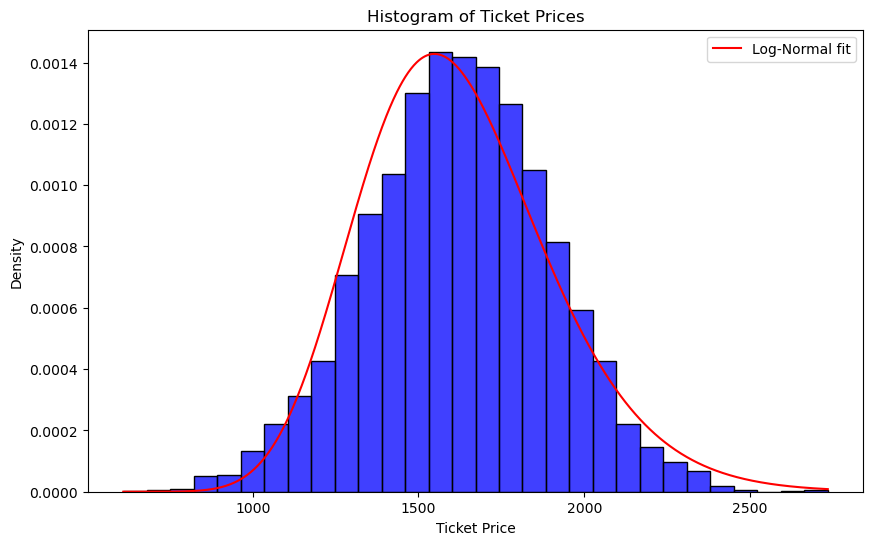

Kolmogorov-Smirnov test: D=0.04163122660970775, p-value=1.4354761081424839e-08
The percentage of passengers who paid less than $930 for their ticket is 0.12% (Log-Normal fit)


In [3]:
# Plot the histogram of ticket prices
plt.figure(figsize=(10, 6))
sns.histplot(ticket_prices, bins=30, kde=False, color='blue', stat='density')
plt.title('Histogram of Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Density')

# Fit a Log-Normal distribution to the data
shape, loc, scale = lognorm.fit(ticket_prices, floc=0)
x = np.linspace(ticket_prices.min(), ticket_prices.max(), 1000)
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot the Log-Normal fit
plt.plot(x, pdf, 'r-', label='Log-Normal fit')
plt.legend()
plt.show()

# Perform a goodness-of-fit test
D, p_value = kstest(ticket_prices, 'lognorm', args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov test: D={D}, p-value={p_value}")

# Calculate the percentage of ticket prices less than $930 using the fitted distribution
percentage_below_930 = lognorm.cdf(930, shape, loc, scale) * 100
print(f"The percentage of passengers who paid less than $930 for their ticket is {percentage_below_930:.2f}% (Log-Normal fit)")

In [4]:
from scipy.stats import poisson

# Calculate the average number of cancelled flights per 500 flights
lambda_500 = df['Number_Cancelled_per_Day_per_500'].mean()

# Calculate the rate per single flight
lambda_per_flight = lambda_500 / 500

# Calculate the expected number of cancelled flights for 20 flights
lambda_20 = 20 * lambda_per_flight

# Calculate the probability of having at least 2 cancelled flights out of 20
prob_at_least_2_cancelled = 1 - poisson.cdf(1, lambda_20)

# Output the result
print(f"The probability of having at least 2 cancelled flights out of 20 is {prob_at_least_2_cancelled:.4f}")

The probability of having at least 2 cancelled flights out of 20 is 0.6054


In [5]:
# Probability of a single flight being canceled
p = lambda_per_flight

# Probability of both flights being canceled
prob_both_canceled = p ** 2

# Output the result as a percentage
prob_both_canceled_percentage = prob_both_canceled * 100
print(f"The probability that both of us would have our flight canceled is {prob_both_canceled_percentage:.4f}%")


The probability that both of us would have our flight canceled is 1.0431%


In [6]:
# Isolate the Bag Delivery Time column
bag_delivery_time = df['Bag_Delivery_Time']

# Remove non-finite values
bag_delivery_time = bag_delivery_time[np.isfinite(bag_delivery_time)]

In [7]:
# Calculate the percentage of passengers who waited at least 25 more minutes
percentage_waited_40_or_more = (bag_delivery_time >= 25).mean() * 100

# Output the result
print(f"The percentage of passengers who waited at least 40 minutes total for their bag is {percentage_waited_40_or_more:.2f}%")


The percentage of passengers who waited at least 40 minutes total for their bag is 17.33%


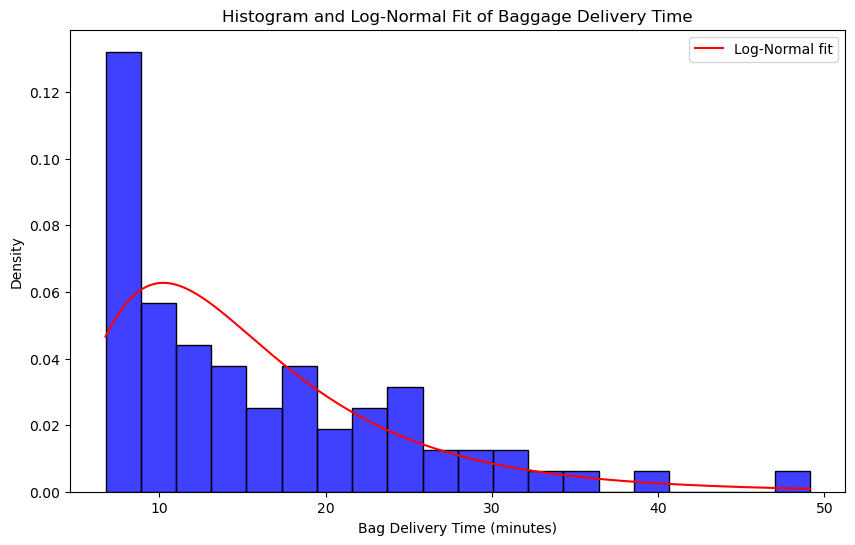

Kolmogorov-Smirnov test: D=0.1072, p-value=0.3306


In [8]:
from scipy.stats import lognorm, kstest

# Fit a Log-Normal distribution to the data
shape, loc, scale = lognorm.fit(bag_delivery_time, floc=0)
x = np.linspace(bag_delivery_time.min(), bag_delivery_time.max(), 1000)
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot the histogram and the Log-Normal fit
plt.figure(figsize=(10, 6))
sns.histplot(bag_delivery_time, bins=20, kde=False, color='blue', stat='density')
plt.plot(x, pdf, 'r-', label='Log-Normal fit')
plt.title('Histogram and Log-Normal Fit of Baggage Delivery Time')
plt.xlabel('Bag Delivery Time (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Perform a goodness-of-fit test
D, p_value = kstest(bag_delivery_time, 'lognorm', args=(shape, loc, scale))
print(f"Kolmogorov-Smirnov test: D={D:.4f}, p-value={p_value:.4f}")

In [9]:
# Isolate the Number of Lost Bags column
lost_bags = df['Number_Lost_Bags']

# Calculate the average number of lost bags per 100 passengers
p_lost_bags = lost_bags.mean() / 100
n_passengers = 100

In [10]:
from scipy.stats import binom, kstest

# Probability of exactly 5 bags lost
prob_exactly_5 = binom.pmf(5, n_passengers, p_lost_bags)

# Probability of 5 or fewer bags lost
prob_5_or_fewer = binom.cdf(5, n_passengers, p_lost_bags)

# Probability of more than 8 bags lost
prob_more_than_8 = 1 - binom.cdf(8, n_passengers, p_lost_bags)

print(f"Probability of exactly 5 bags lost: {prob_exactly_5:.4f}")
print(f"Probability of 5 or fewer bags lost: {prob_5_or_fewer:.4f}")
print(f"Probability of more than 8 bags lost: {prob_more_than_8:.4f}")


Probability of exactly 5 bags lost: 0.0519
Probability of 5 or fewer bags lost: 0.9727
Probability of more than 8 bags lost: 0.0005


In [11]:
from scipy.stats import chisquare

# Calculate the observed frequencies
observed_frequencies = lost_bags.value_counts().sort_index()

# Calculate the expected frequencies using the Binomial distribution
expected_frequencies = [binom.pmf(k, n_passengers, p_lost_bags) * len(lost_bags) for k in observed_frequencies.index]

# Perform the chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-square test: chi2_stat={chi2_stat:.4f}, p-value={p_value:.4f}")


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
106.77127862477636